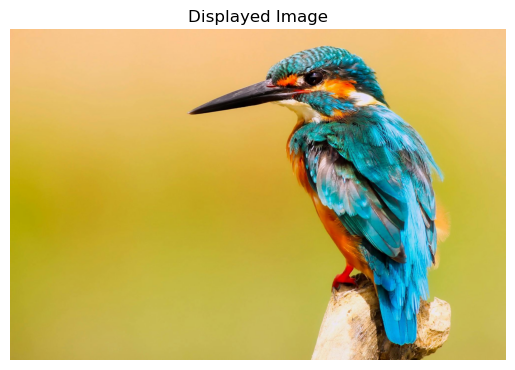

In [1]:
import cv2
import matplotlib.pyplot as plt

# Step 1: Read the image
image = cv2.imread('bird.jpg')

# Step 2: Save the image
cv2.imwrite('saved_image.jpg', image)

# Step 3: Convert BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 4: Display
plt.imshow(image_rgb)
plt.title("Displayed Image")
plt.axis('off')
plt.show()

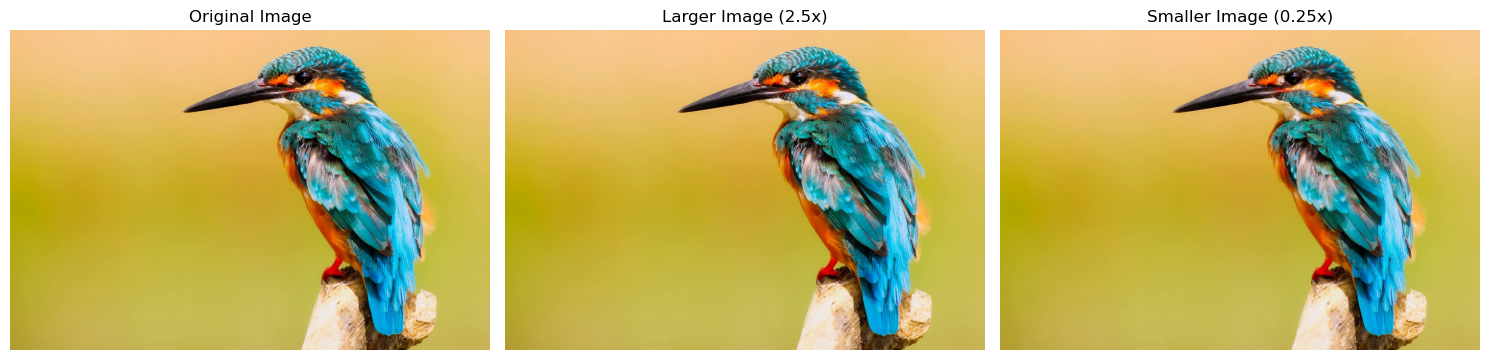

In [2]:
image = cv2.imread('bird.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
larger = cv2.resize(image, None, fx=2.5, fy=2.5, interpolation=cv2.INTER_LINEAR)
larger_rgb = cv2.cvtColor(larger, cv2.COLOR_BGR2RGB)
smaller = cv2.resize(image, None, fx=0.25, fy=0.25, interpolation=cv2.INTER_AREA)
smaller_rgb = cv2.cvtColor(smaller, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1) # Original
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')
plt.subplot(1, 3, 2) # Larger
plt.imshow(larger_rgb)
plt.title("Larger Image (2.5x)")
plt.axis('off')
plt.subplot(1, 3, 3) # Smaller
plt.imshow(smaller_rgb)
plt.title("Smaller Image (0.25x)")
plt.axis('off')
plt.tight_layout()
plt.show()

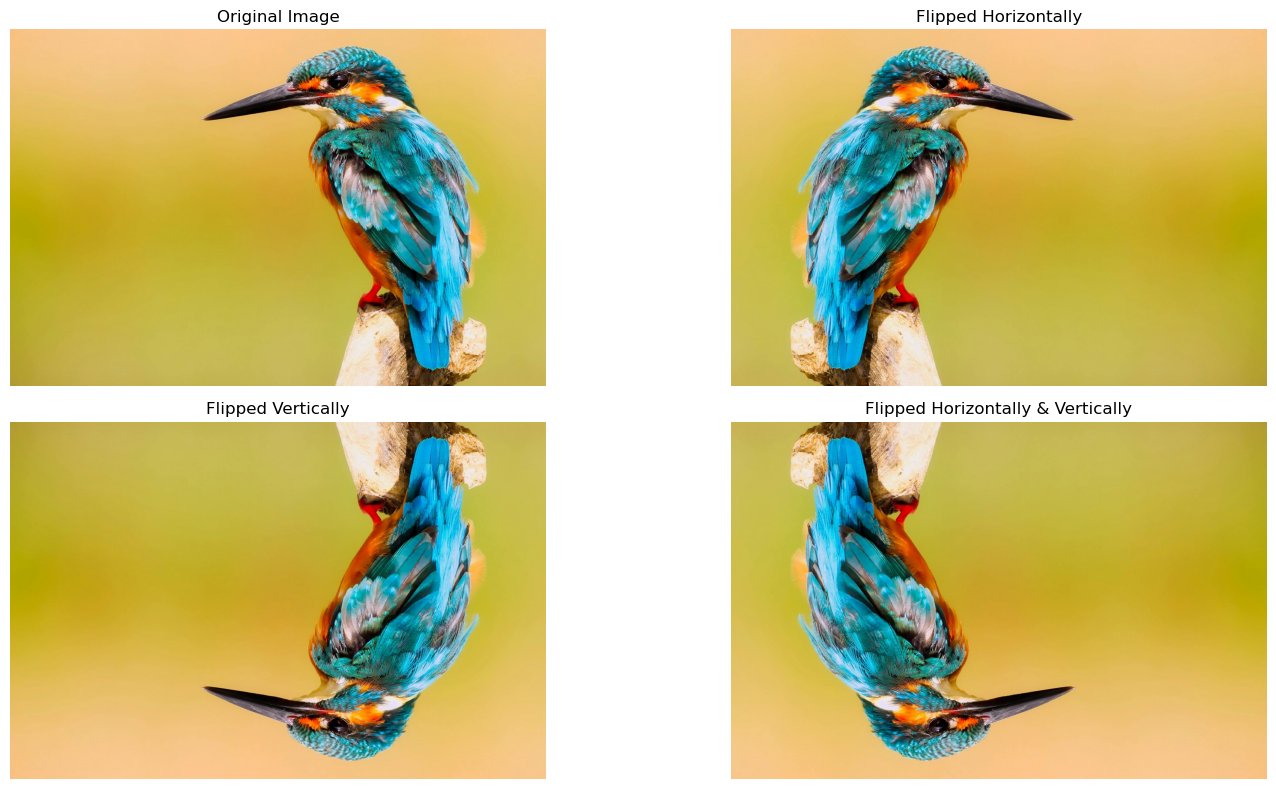

In [3]:
image = cv2.imread('bird.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
flip_h = cv2.flip(image, 1) # Flip horizontally
flip_h_rgb = cv2.cvtColor(flip_h, cv2.COLOR_BGR2RGB)
flip_v = cv2.flip(image, 0) # Flip vertically
flip_v_rgb = cv2.cvtColor(flip_v, cv2.COLOR_BGR2RGB)
flip_both = cv2.flip(image, -1) # Flip both directions
flip_both_rgb = cv2.cvtColor(flip_both, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(flip_h_rgb)
plt.title("Flipped Horizontally")
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(flip_v_rgb)
plt.title("Flipped Vertically")
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(flip_both_rgb)
plt.title("Flipped Horizontally & Vertically")
plt.axis('off')
plt.tight_layout()
plt.show()

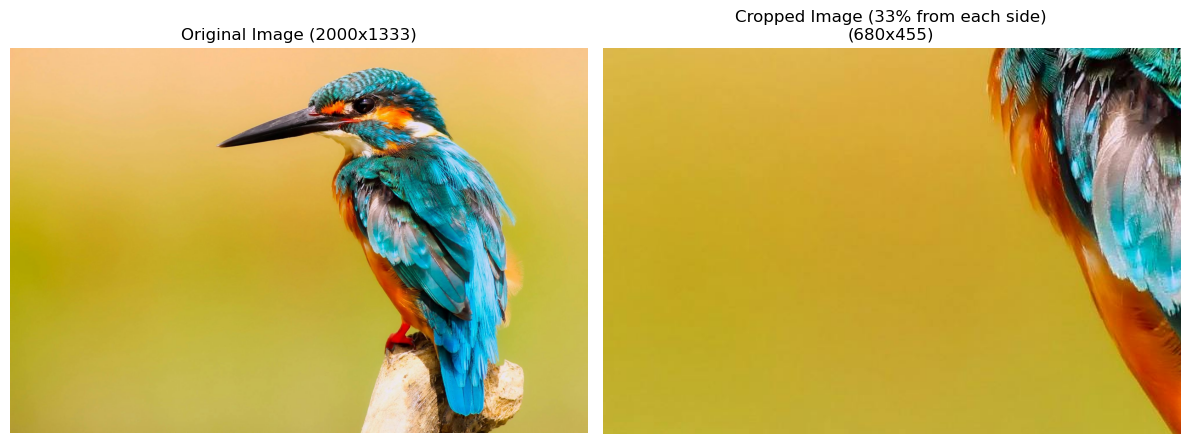

In [4]:
image = cv2.imread('bird.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
height, width = image.shape[:2]
crop_h = int(height * 0.33) # Crop margins (33%)
crop_w = int(width * 0.33)
cropped = image[crop_h:height - crop_h, crop_w:width - crop_w]
cropped_rgb = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title(f'Original Image ({width}x{height})')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cropped_rgb)
plt.title(f'Cropped Image (33% from each side)\n({cropped.shape[1]}x{cropped.shape[0]})')
plt.axis('off')
plt.tight_layout()
plt.show()

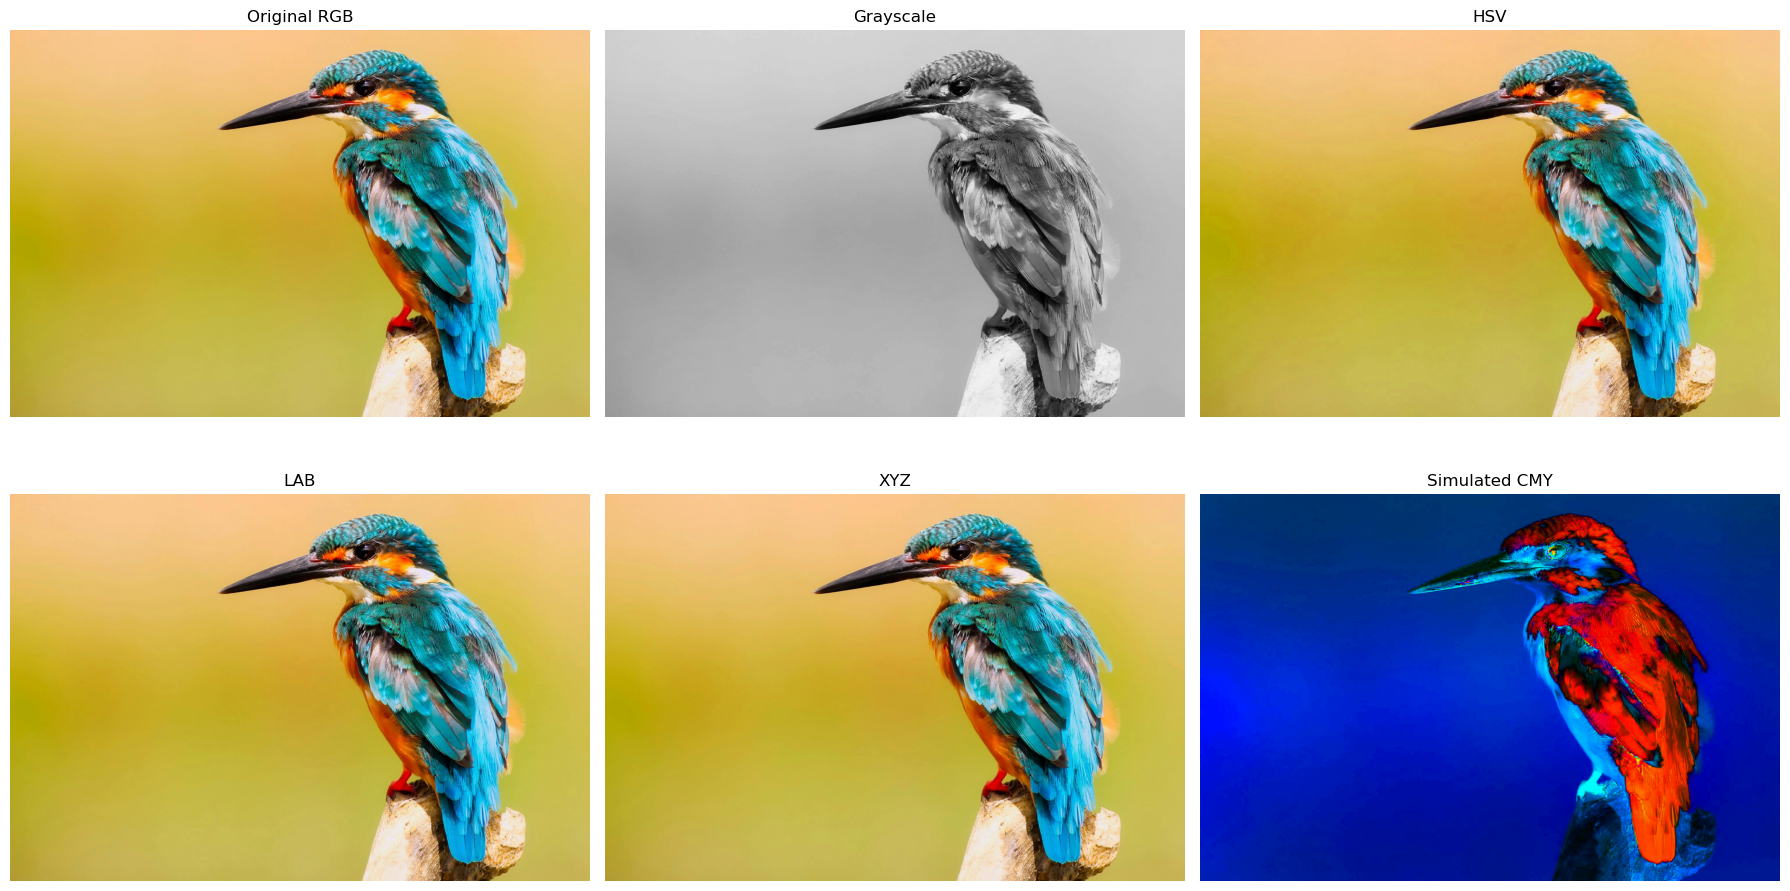

In [5]:
import numpy as np
image = cv2.imread('bird.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # Grayscale
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # HSV
hsv_rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB) # LAB
lab_rgb = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)
xyz = cv2.cvtColor(image, cv2.COLOR_BGR2XYZ) # XYZ
xyz_rgb = cv2.cvtColor(xyz, cv2.COLOR_XYZ2RGB)
rgb_norm = image_rgb.astype(float) / 255 # CMYK (approximation)
K = 1 - np.max(rgb_norm, axis=2)
C = (1 - rgb_norm[..., 0] - K) / (1 - K + 1e-8)
M = (1 - rgb_norm[..., 1] - K) / (1 - K + 1e-8)
Y = (1 - rgb_norm[..., 2] - K) / (1 - K + 1e-8)
CMY_image = np.stack([C, M, Y], axis=2)
CMY_image = (CMY_image * 255).astype(np.uint8)

titles = ['Original RGB', 'Grayscale', 'HSV', 'LAB', 'XYZ', 'Simulated CMY']
images = [image_rgb, gray, hsv_rgb, lab_rgb, xyz_rgb, CMY_image]
cmaps = [None, 'gray', None, None, None, None]
plt.figure(figsize=(18, 10))
for i in range(len(images)):
    plt.subplot(2, 3, i + 1)
    if cmaps[i]:
        plt.imshow(images[i], cmap=cmaps[i])
    else:
        plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

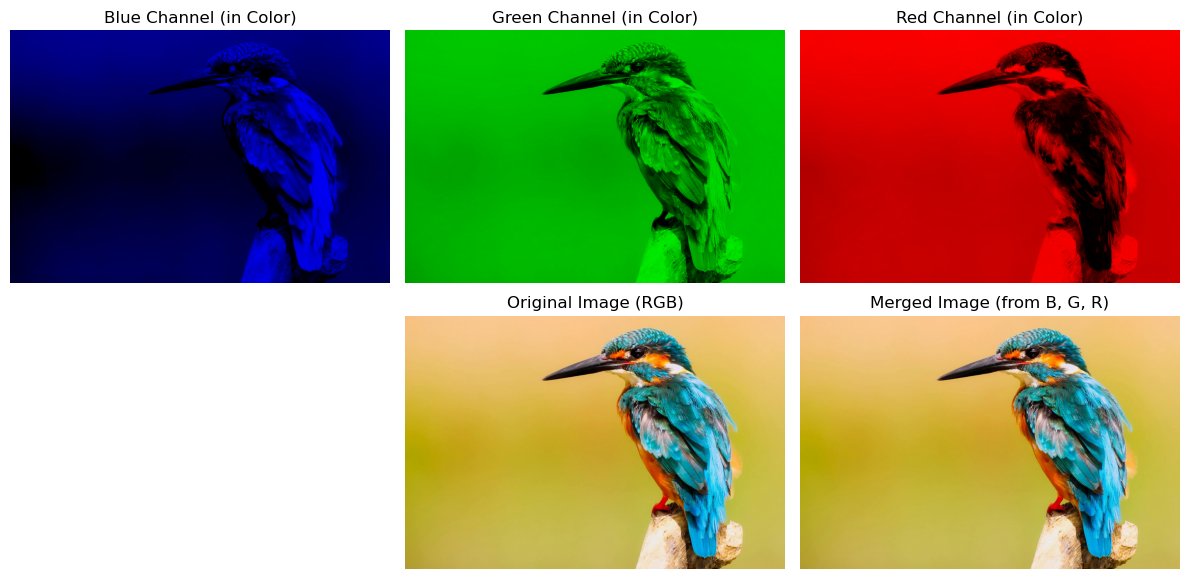

In [6]:
image = cv2.imread('bird.jpg')
b, g, r = cv2.split(image)
zeros = np.zeros_like(b)
blue_image = cv2.merge([b, zeros, zeros])
green_image = cv2.merge([zeros, g, zeros])
red_image = cv2.merge([zeros, zeros, r])
original_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
blue_rgb = cv2.cvtColor(blue_image, cv2.COLOR_BGR2RGB)
green_rgb = cv2.cvtColor(green_image, cv2.COLOR_BGR2RGB)
red_rgb = cv2.cvtColor(red_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
plt.imshow(blue_rgb)
plt.title("Blue Channel (in Color)")
plt.axis('off')
plt.subplot(2, 3, 2)
plt.imshow(green_rgb)
plt.title("Green Channel (in Color)")
plt.axis('off')
plt.subplot(2, 3, 3)
plt.imshow(red_rgb)
plt.title("Red Channel (in Color)")
plt.axis('off')
plt.subplot(2, 3, 5) # Original & Merged
plt.imshow(original_rgb)
plt.title("Original Image (RGB)")
plt.axis('off')
merged = cv2.merge((b, g, r))  # BGR
merged_rgb = cv2.cvtColor(merged, cv2.COLOR_BGR2RGB)
plt.subplot(2, 3, 6)
plt.imshow(merged_rgb)
plt.title("Merged Image (from B, G, R)")
plt.axis('off')
plt.tight_layout()
plt.show()

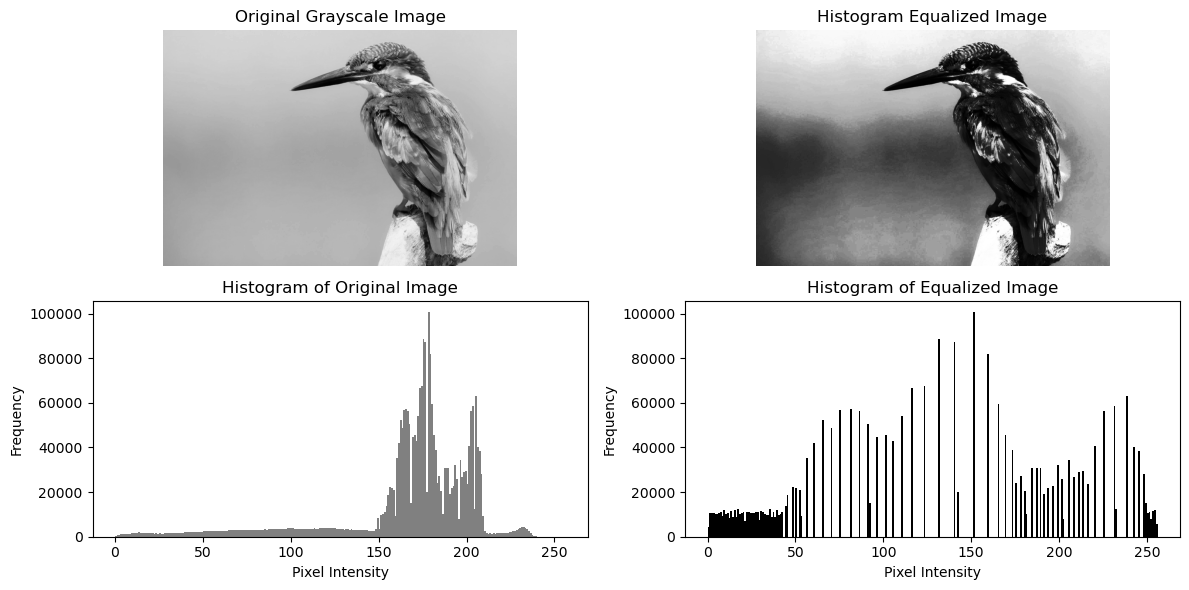

In [7]:
image = cv2.imread('bird.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
equalized = cv2.equalizeHist(gray) # Equalize histogram
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(equalized, cmap='gray')
plt.title("Histogram Equalized Image")
plt.axis('off')
plt.subplot(2, 2, 3) # Histograms
plt.hist(gray.ravel(), bins=256, range=[0, 256], color='gray')
plt.title("Histogram of Original Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.subplot(2, 2, 4)
plt.hist(equalized.ravel(), bins=256, range=[0, 256], color='black')
plt.title("Histogram of Equalized Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

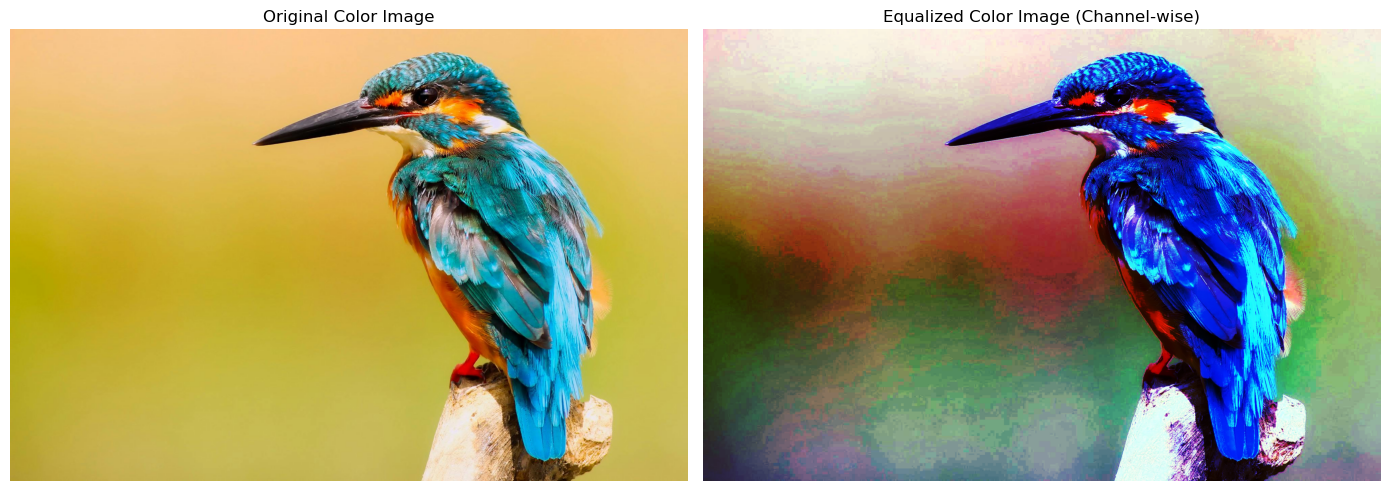

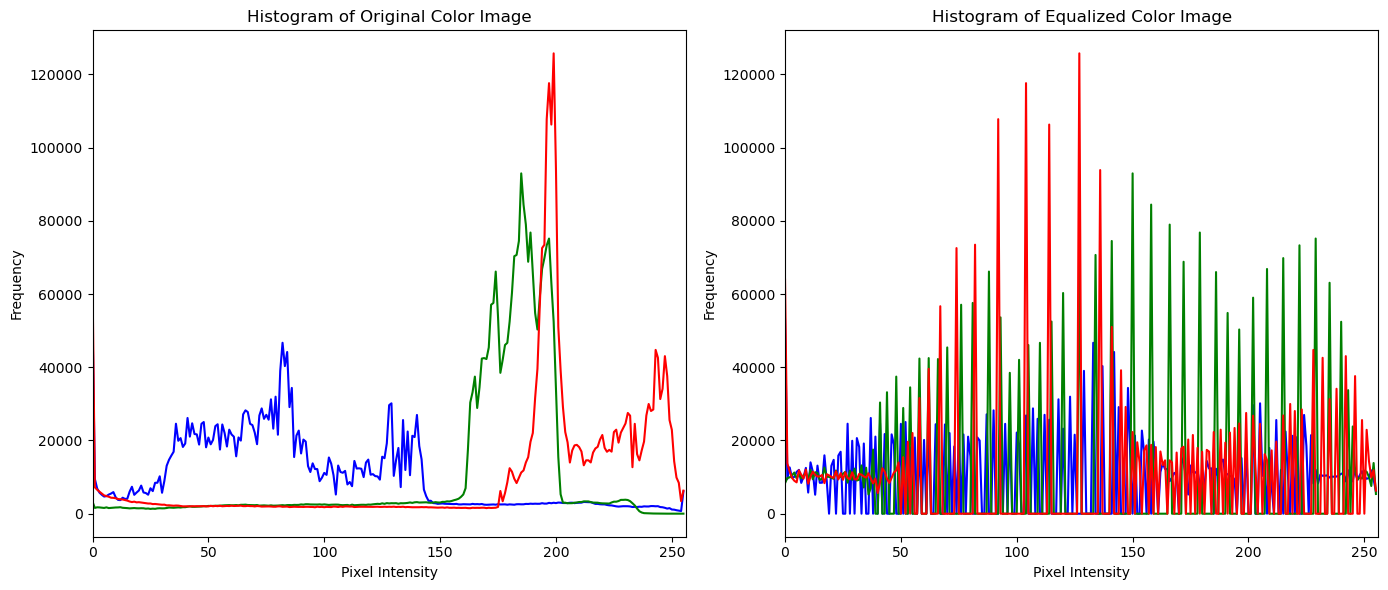

In [8]:
image = cv2.imread('bird.jpg')
b, g, r = cv2.split(image)
b_eq = cv2.equalizeHist(b)
g_eq = cv2.equalizeHist(g)
r_eq = cv2.equalizeHist(r)
equalized_img = cv2.merge((b_eq, g_eq, r_eq)) # Merge
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
equalized_rgb = cv2.cvtColor(equalized_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Color Image")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(equalized_rgb)
plt.title("Equalized Color Image (Channel-wise)")
plt.axis('off')
plt.tight_layout()
plt.show()
colors = ('b', 'g', 'r') # Histograms
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
for i, color in enumerate(colors):
    hist = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
plt.title("Histogram of Original Color Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.xlim([0, 256])
plt.subplot(1, 2, 2) # Equalized histograms
for i, color in enumerate(colors):
    hist_eq = cv2.calcHist([equalized_img], [i], None, [256], [0, 256])
    plt.plot(hist_eq, color=color)
plt.title("Histogram of Equalized Color Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.xlim([0, 256])
plt.tight_layout()
plt.show()